### Feature Selection

This notebook looks at feature correlations and removes any features that are highly correlated. Again no need to run this as the training data is fully available in the last notebook where the model is trained.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb
import glob
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
try:
    if os.path.exists('plots'):
        shutil.rmtree('plots')
    os.makedirs('plots')
except Exception as e:
    print(e)

In [8]:
#load the training data
train_files = glob.glob('feats/train_*.pkl')
train = []
for train_file in train_files:
    train.append(pd.read_pickle(train_file))

train = pd.concat(train)

#load the test data
test_files = glob.glob('feats/test_*.pkl')
test = []
for test_file in test_files:
    test.append(pd.read_pickle(test_file))

test = pd.concat(test)

In [3]:
for column in train.columns:
    if any(isinstance(x, (list, np.ndarray)) for x in train[column]):
        print(f"Column {column} contains non-scalar types.")


Column X_cont contains non-scalar types.


In [9]:
# Example of how you might check this after loading
sample = train['X_cont'].iloc[0]
print("Shape of sample X_cont:", np.array(sample).shape)


Shape of sample X_cont: (10, 5)


In [5]:
if any(isinstance(x, (list, np.ndarray)) for x in train['X_cont']):
    train['X_cont'] = train['X_cont'].apply(lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) else x)


In [6]:
train = train.apply(pd.to_numeric, errors='coerce')


In [7]:
# Example of how you might check this after loading
sample = train['X_cont'].iloc[0]
print("Shape of sample X_cont:", np.array(sample).shape)


Shape of sample X_cont: ()


Look at feature correlations. In this case, there aren't any large correlations so just keep all the data.

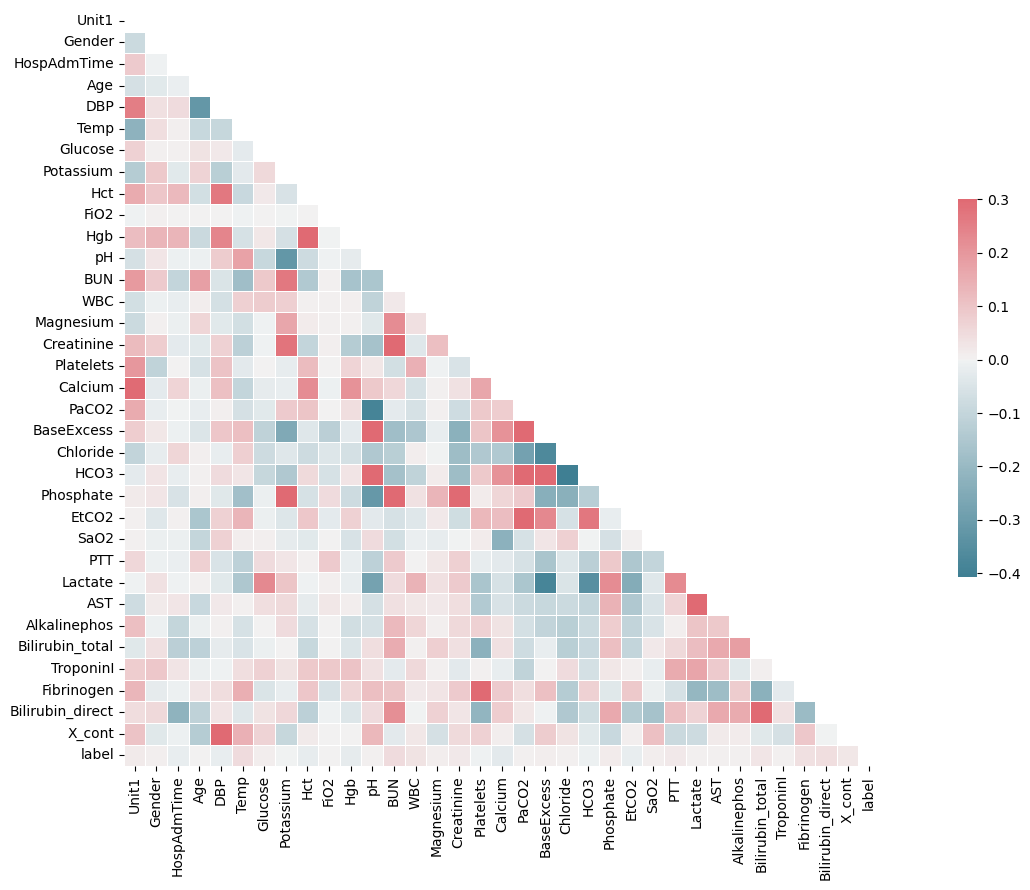

In [9]:
#look at feature correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#make the heatmap plot
plt.figure(figsize=(16,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('plots/heatmap.png', dpi=250)
plt.show()

#save the data
train.to_pickle('train.pkl')
test.to_pickle('test.pkl')

In [10]:
#save the data
train.to_pickle('train2.pkl')
test.to_pickle('test2.pkl')